<a href="https://colab.research.google.com/github/LeelaKarthik-26/IT7103/blob/main/Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 2**
**Pandas and Pipeline**



In this assignment, we will practice loading datasets from Pandas, visualization, and writing processing pipelines. We will work with the auto-mpg data in which each row carries information for a car model.

The data has the following columns:
1.	mpg:           	mile per gallon rate of the car
2.	cylinders:     	number of cylinders the car has
3.	displacement: 	displacement of the car
4.	horsepower:    	horsepower of the car
5.	weight:        	weight of the car
6.	acceleration:  	acceleration of the car
7.	model year:    	the year the car was introduced
8.	origin:        	the development location of the car (number codes represent Asia, Europe, and North America)
9.	car name:      	model name of the car (unique for each car model)


***Load the data into a Python session as a Pandas DataFrame. Check if all columns are in correct type, and fix any incorrect ones if necessary***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

car_mpg = pd.read_csv('/content/drive/MyDrive/auto-mpg.csv')
car_mpg.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [ ]:
car_mpg.shape

(398, 9)

I am considering the target column in this data as **mpg**

In [ ]:
car_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


Here, there are no empty columns. Becase the Non-Null count is 398. which
is equal to the number of rows in the raw data(auto-mpg.csv) and All the dtype of the columns are correct.
i.e,

*   **Non-null Count = no.of rows in auto-mpg.csv**
*  **All the dtypes are correct**






***Split the data 75% training and 25% testing***

In [ ]:
from sklearn.model_selection import train_test_split
traindata, testdata = train_test_split(car_mpg, test_size=0.25)
traindata.shape, testdata.shape

((298, 9), (100, 9))

Visualize necessary columns in the data. After this point, you should have three lists:

•	Columns that are numeric and have symmetric distributions

•	Columns that are numeric and have skewed distributions

•	Columns that are categorical


In [ ]:
traindata.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,298.000000,298.000000,298.000000,292.000000,298.000000,298.000000,298.000000,298.000000
mean,23.674832,5.479866,194.937919,106.359589,2985.389262,15.487584,76.134228,1.570470
std,7.940520,1.721697,106.221199,39.404469,864.672743,2.653911,3.736539,0.810329
min,9.000000,3.000000,70.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,102.000000,76.750000,2221.500000,14.000000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,95.000000,2807.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3641.750000,17.000000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,23.700000,82.000000,3.000000


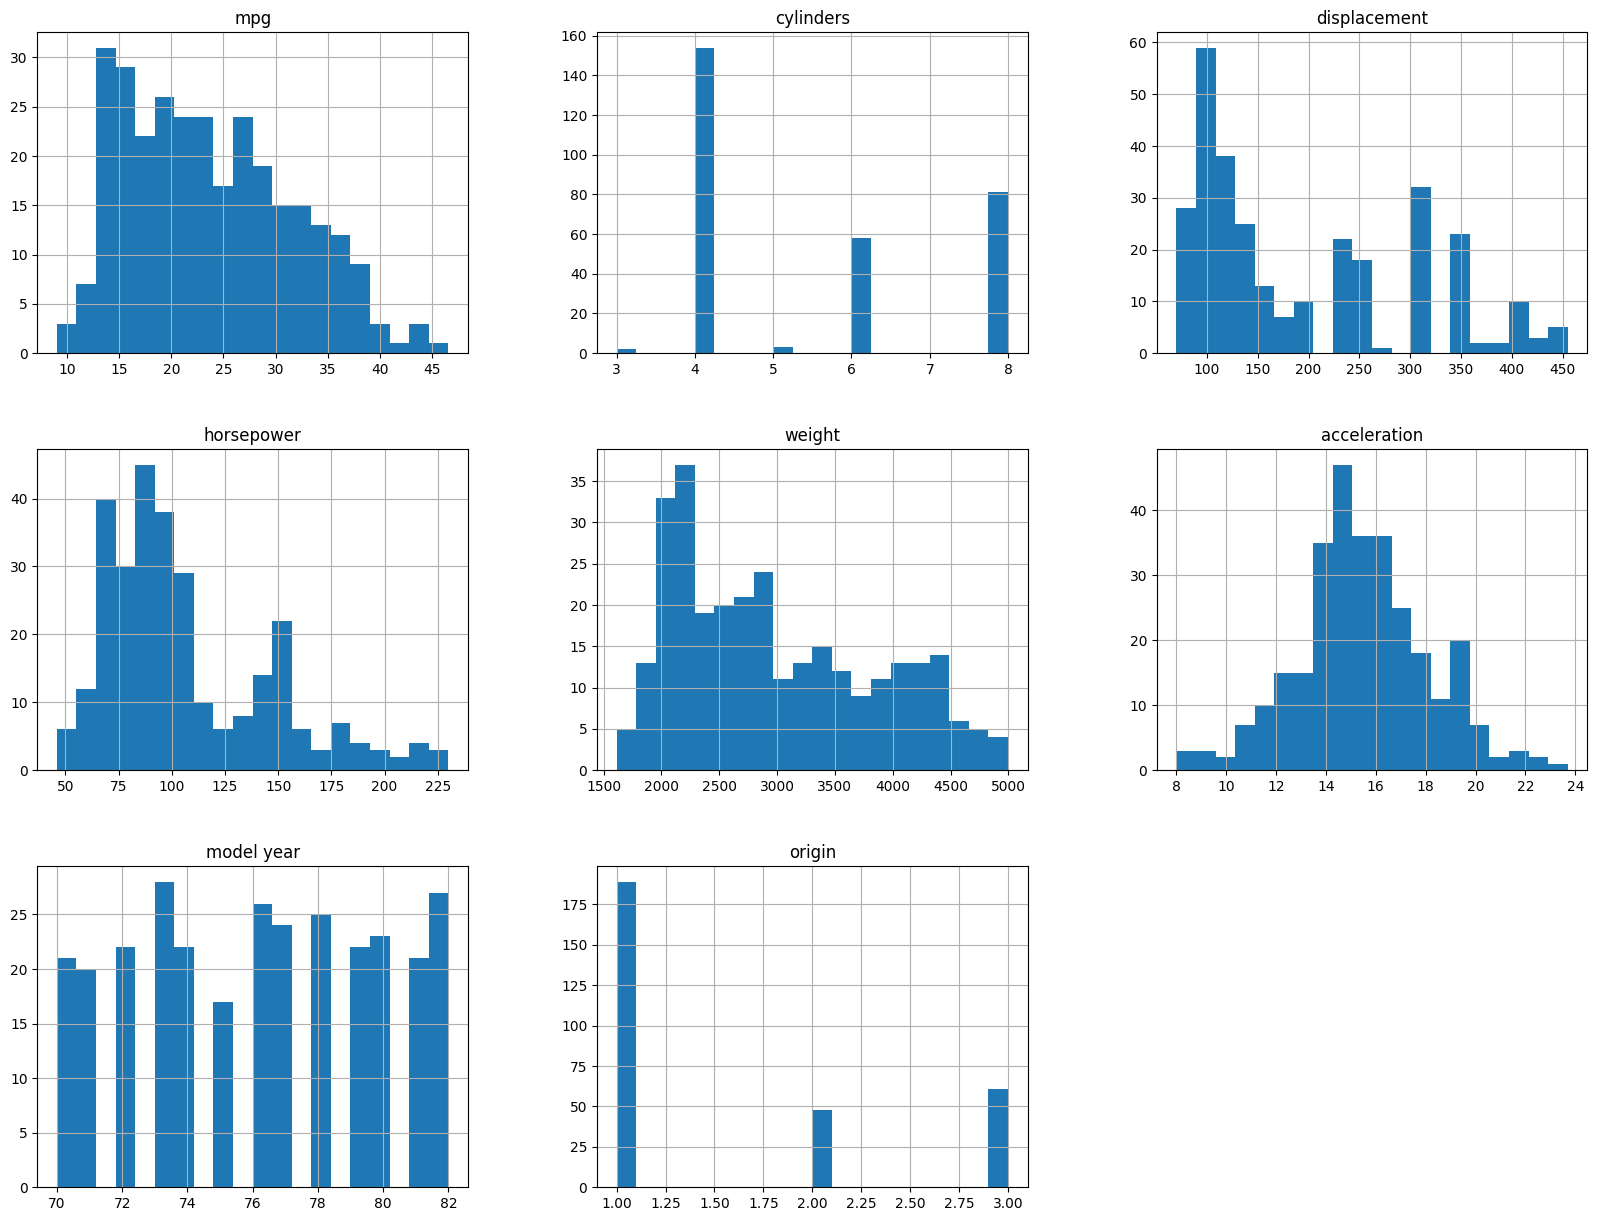

In [ ]:
from matplotlib import pyplot as plt

traindata.hist(bins=20, figsize=(20,15))
plt.show()

In [ ]:
num_cols = [column for column in car_mpg.columns if (traindata[column].dtypes == np.int64) or (traindata[column].dtypes == np.float64)]
num_cols

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin']

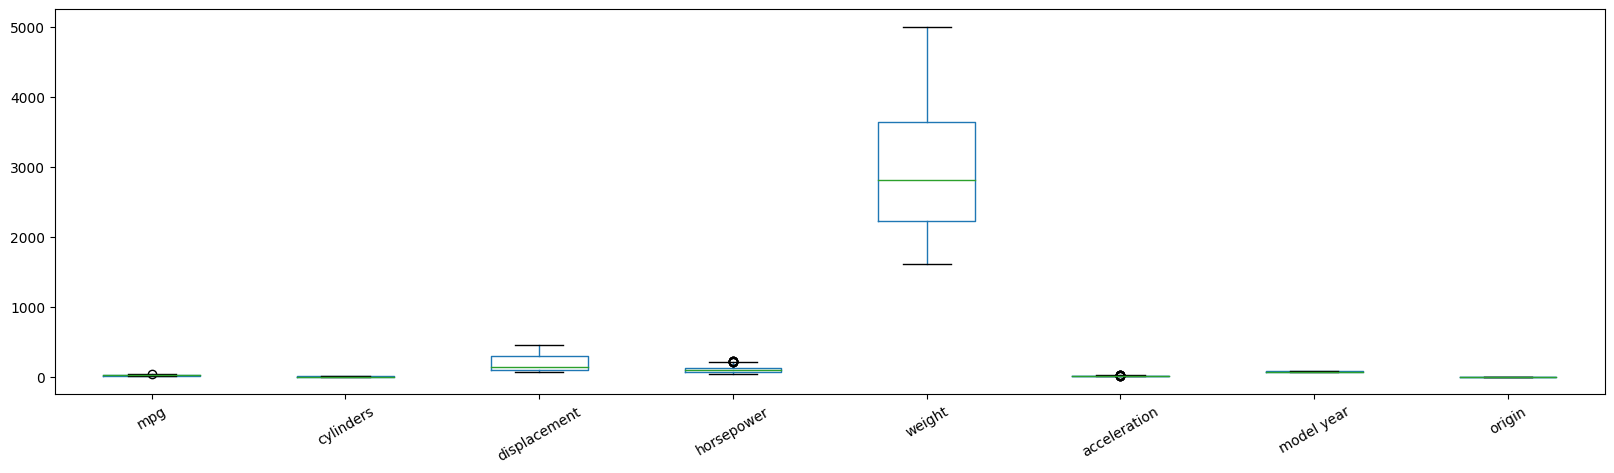

In [ ]:
traindata[num_cols].boxplot(grid=False, figsize=(20,5), rot=30)
plt.show()

In [ ]:
cat_cols = [column for column in traindata.columns if traindata[column].dtypes == object]
cat_cols

['car name']

***Train the pipeline on the training data. Then perform transformation on the training data and testing data.***

Build a pipeline as follows:

•	Numeric and symmetric columns: 	Imputation -> Standardization

•	Numeric and skewed columns:		Imputation -> Log transformation -> Standardization

•	Categorical columns: 			One hot encoder


In [ ]:
num_cols = ['cylinders', 'acceleration', 'model year', 'origin']   #this list is for symmetric numeric columns
log_cols = [ 'displacement', 'horsepower', 'weight']   #this list is for skewed numeric columns
cat_cols = ['car name']
target = 'mpg'

In [ ]:
#processing pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

num_pipeline = Pipeline([                           #now we need a small pipeline for numeric columns since it has two steps
    ('impute', SimpleImputer(strategy='median')),   #this step will impute missing values using column medians
    ('standardize', StandardScaler())               #this step will scale all numeric columns
])

def log_transformation(x):
    return np.log(x+0.1)

log_pipeline = Pipeline([                                        #now we need a small pipeline for numeric columns since it has two steps
    ('impute', SimpleImputer(strategy='median')),                #this step will impute missing values using column medians
    ('log transform', FunctionTransformer(log_transformation)), #this include a log transformation into the pipeline
    ('standardize', StandardScaler())                            #this step will scale all numeric columns
])

processing_pipeline = ColumnTransformer([                                                      #this transformer merges the processed numeric columns and class columns
    ('numeric', num_pipeline, num_cols),                                                       #numeric columns
    ('log', log_pipeline, log_cols),                                                           #log columns
    ('class', OneHotEncoder(max_categories=5, handle_unknown='infrequent_if_exist'), cat_cols) #encoder to transform class columns to numeric, this will automatically handle missing data
  ])

In [ ]:
processing_pipeline

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['cylinders', 'acceleration', 'model year',
                                  'origin']),
                                ('log',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('log transform',
                                                  FunctionTransformer(func=<function log_transformation at 0x7fda703f3f40>)),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['displacement', 'horsepower', 'weight']),
                                ('class',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                                               max_categories=5),
                                 ['car name'])])

***Print the shape of the processed training data and processed testing data.***

In [ ]:
traindata_processed = processing_pipeline.fit_transform(traindata)
testdata_processed = processing_pipeline.transform(testdata)
traindata_processed.shape, testdata_processed.shape

((298, 12), (100, 12))